In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import oommfpy as op

In [3]:
omfs = glob.glob('sims/oommf/spirals_helices_FeGe_Lx1000nm_Ly100nm_Lz1000nm/spirals_helices/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=m_Bz)\d+', f).group(0)))

In [4]:
omfs

['sims/oommf/spirals_helices_FeGe_Lx1000nm_Ly100nm_Lz1000nm/spirals_helices/m_Bz0mT-Oxs_MinDriver-Magnetization-00-0291381.omf']

In [6]:
c_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    fltr = data.z == data.zs[len(data.zs) // 2]
    _map = data.field_z[fltr].reshape(len(data.xs), -1)
    c_maps.append(np.copy(_map))

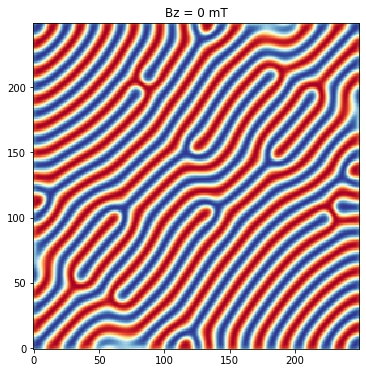

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

for idx, i in enumerate([0]):
    # ax = axs.flatten()[idx]
    ax.imshow(c_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
    ax.set_title('Bz = {} mT'.format(i))

In [12]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.xs), len(data.ys)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.xs), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

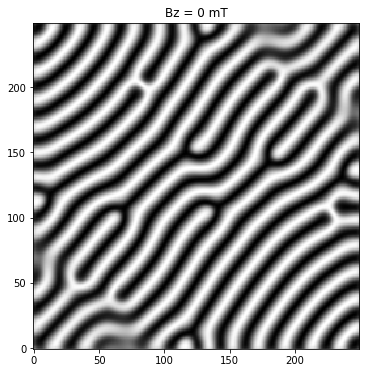

In [14]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

for idx, i in enumerate([0]):
    ax.imshow(bw_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('Bz = {} mT'.format(i))